### 1. Scipy Lectures Statistics & Pandas
http://www.scipy-lectures.org/packages/statistics/index.html#id5

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.style.use('ggplot')
from scipy import stats
import numpy as np

#### 瞟一眼数据大小和特征
- 发现分隔符为' ; '，一会导入数据的时候注意标明sep＝' ; '
- 有一个数值为' . '，估计是缺失值，导入数据时标明 na_values = ' . '

In [19]:
!head -n 5 brain_size.csv

"";"Gender";"FSIQ";"VIQ";"PIQ";"Weight";"Height";"MRI_Count"
"1";"Female";133;132;124;"118";"64.5";816932
"2";"Male";140;150;124;".";"72.5";1001121
"3";"Male";139;123;150;"143";"73.3";1038437
"4";"Male";133;129;128;"172";"68.8";965353


#### 导入数据

In [30]:
brain = pd.read_csv('brain_size.csv', sep=';', na_values = '.')

In [31]:
brain[0:5]

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


#### 初步总结

In [47]:
brain.describe()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


#### 如何分类查看数据 － 按性别查看被试的描述性统计值
- index: 原本索引行和列的位置输入条件

In [40]:
brain[brain['Gender'] == 'Male']['VIQ'].mean()

115.25

In [41]:
brain[brain['Gender'] == 'Female']['VIQ'].mean()

109.45

#### 尝试一个更简便的方法 － 先分组，后计算

In [51]:
groupby_G = brain.groupby('Gender')
groupby_G.describe()
# max, min, mean ...

FSIQ     Height     MRI_Count         PIQ  Unnamed: 0  \
Gender                                                                      
Female count   20.000000  20.000000  2.000000e+01   20.000000   20.000000   
       mean   111.900000  65.765000  8.626546e+05  110.450000   19.650000   
       std     23.686327   2.288248  5.589356e+04   21.946046   11.356774   
       min     77.000000  62.000000  7.906190e+05   72.000000    1.000000   
       25%     90.250000  64.500000  8.280620e+05   93.000000   10.250000   
       50%    115.500000  66.000000  8.553650e+05  115.000000   18.000000   
       75%    133.000000  66.875000  8.826685e+05  128.750000   29.250000   
       max    140.000000  70.500000  9.913050e+05  147.000000   38.000000   
Male   count   20.000000  19.000000  2.000000e+01   20.000000   20.000000   
       mean   115.000000  71.431579  9.548554e+05  111.600000   21.350000   
       std     24.986312   3.283131  5.591135e+04   23.540335   12.248630   
       min     80.000000  66.300000  8.799870e+05   74.000000    2.000000   
       25%     89.750000  68.900000  9.195292e+05   86.000000   11.500000   
       50%    118.000000  70.500000  9.472415e+05  117.000000   21.500000   
       75%    139.250000  73.750000  9.734960e+05  128.000000   32.250000   
       max    144.000000  77.000000  1.079549e+06  150.000000   40.000000   

                     VIQ      Weight  
Gender                                
Female count   20.000000   20.000000  
       mean   109.450000  137.200000  
       std     21.670924   16.953807  
       min     71.000000  106.000000  
       25%     90.000000  125.750000  
       50%    116.000000  138.500000  
       75%    129.000000  146.250000  
       max    136.000000  175.000000  
Male   count   20.000000   18.000000  
       mean   115.250000  166.444444  
       std     25.640993   20.047656  
       min     77.000000  132.000000  
       25%     95.250000  148.750000  
       50%    110.500000  172.000000  
       75%    145.000000  180.750000  
       max    150.000000  192.000000

#### 画个图看看 - 分PIQ，VIQ，FSIQ画图

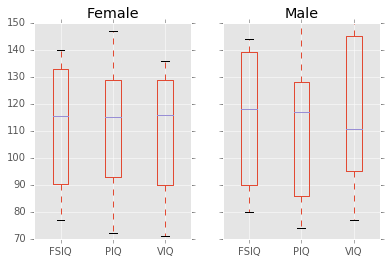

In [66]:
groupby_G.boxplot(column=['FSIQ', 'PIQ', 'VIQ'])
plt.show()

#### 看看weight，height，IQ的数据分布情况及关系
- weight与height呈正相关, 目测相关系数在0.65以上   

想起了一个魔性的小游戏      
http://guessthecorrelation.com/

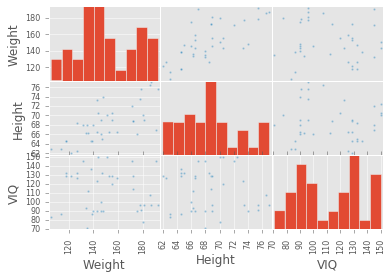

In [74]:
from pandas.tools import plotting
plotting.scatter_matrix(brain[['Weight', 'Height', 'VIQ']],)
plt.show()

#### T检验1 - Testing the value of a population mean
检验一下110和40，很明显，40绝非总体期望

In [78]:
stats.ttest_1samp(brain['VIQ'], 110)

Ttest_1sampResult(statistic=0.62934610530926349, pvalue=0.53279205000389074)

In [79]:
stats.ttest_1samp(brain['VIQ'], 40)

Ttest_1sampResult(statistic=19.375825837925667, pvalue=1.2870758335005593e-21)

#### T检验2 - Testing for different across populations
看看这组数据中，男性被试和女性被试的VIQ差异

In [80]:
stats.ttest_ind(brain[brain['Gender'] == 'Female']['VIQ'], brain[brain['Gender'] == 'Male']['VIQ'])

Ttest_indResult(statistic=-0.77261617232750113, pvalue=0.44452876778583217)

### 2. Pandas 部分内容复习

#### 1. 转置直接用 df.T 就可以了

In [81]:
brain.T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Unnamed: 0,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
Gender,Female,Male,Male,Male,Female,Female,Female,Female,Male,Male,...,Female,Male,Male,Male,Female,Female,Male,Female,Male,Male
FSIQ,133,140,139,133,137,99,138,92,89,133,...,133,144,103,90,83,133,140,88,81,89
VIQ,132,150,123,129,132,90,136,90,93,114,...,126,145,96,96,90,129,150,86,90,91
PIQ,124,124,150,128,134,110,131,98,84,147,...,132,137,110,86,81,128,124,94,74,89
Weight,118,NaN,143,172,147,146,138,175,134,172,...,127,191,192,181,143,153,144,139,148,179
Height,64.5,72.5,73.3,68.8,65,69,64.5,66,66.3,68.8,...,62.5,67,75.5,69,66.5,66.5,70.5,64.5,74,75.5
MRI_Count,816932,1001121,1038437,965353,951545,928799,991305,854258,904858,955466,...,857782,949589,997925,879987,834344,948066,949395,893983,930016,935863


#### 2. 排序方法之 sort_values(by =)

In [92]:
brain.sort_values(by='PIQ', ascending=False)[:5]

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
2,3,Male,139,123,150,143.0,73.3,1038437
9,10,Male,133,114,147,172.0,68.8,955466
13,14,Female,140,120,147,155.0,70.5,856472
31,32,Male,144,145,137,191.0,67.0,949589
4,5,Female,137,132,134,147.0,65.0,951545


#### 3. df.loc 根据标签进行切片

In [117]:
brain.loc[0:5, ['Gender', 'VIQ']]

,Gender,VIQ
0,Female,132
1,Male,150
2,Male,123
3,Male,129
4,Female,132
5,Female,90


#### 4. df.iloc 依据行列位置进行切片

In [121]:
brain.iloc[0:5, [1,3]]

,Gender,VIQ
0,Female,132
1,Male,150
2,Male,123
3,Male,129
4,Female,132


#### 5.  假设有三个categorical data，如何快速抽取其中两个

In [142]:
#先对唯一的分类数据进行修改
brain.iloc[0:5, 1] = 'Trans'

#### 用df.isin() 过滤数据
- 先抽取到分类数据的那一列Gender
- 再抽取需要的数据

```
brain['Gender'].isin(['Trans', 'Female'])
```

In [144]:
brain[brain['Gender'].isin(['Female', 'Trans'])][0:8]

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Trans,133,132,124,118.0,64.5,816932
1,2,Trans,140,150,124,NaN,72.5,1001121
2,3,Trans,139,123,150,143.0,73.3,1038437
3,4,Trans,133,129,128,172.0,68.8,965353
4,5,Trans,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258


#### 慎用df.dropna 确实值所在的整行数据将被删除

In [148]:
brain[0:3]

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Trans,133,132,124,118.0,64.5,816932
1,2,Trans,140,150,124,NaN,72.5,1001121
2,3,Trans,139,123,150,143.0,73.3,1038437


In [159]:
# 包含NaN的第二行没有了
brain.dropna(how = 'any')[0:3]

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Trans,133,132,124,118.0,64.5,816932
2,3,Trans,139,123,150,143.0,73.3,1038437
3,4,Trans,133,129,128,172.0,68.8,965353


In [160]:
# 还是用df.fillna好咯
brain.fillna(value='0')[0:3]

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Trans,133,132,124,118,64.5,816932
1,2,Trans,140,150,124,0,72.5,1001121
2,3,Trans,139,123,150,143,73.3,1038437


#### 6. 合并数据表 df.append

In [165]:
new = brain[0:3]
brain.append(new, ignore_index=True)

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Trans,133,132,124,118.0,64.5,816932
1,2,Trans,140,150,124,NaN,72.5,1001121
2,3,Trans,139,123,150,143.0,73.3,1038437
3,4,Trans,133,129,128,172.0,68.8,965353
4,5,Trans,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


#### 7. 对groupby的新认识
相较sort.values(by=)而言，groupby可针对categorical data的数据进行分类处理 (用来分组的那一列会变为index)。

In [170]:
brain.sort_values(by='Gender')[0:3]

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
30,31,Female,133,126,132,127.0,62.5,857782
22,23,Female,135,129,134,122.0,62.0,790619
26,27,Female,85,90,84,140.0,68.0,798612


In [180]:
brain.groupby('Gender').count()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,18,18,18,18,18,18,18
Male,17,17,17,17,16,16,17
Trans,5,5,5,5,4,5,5


还可以进行层级索引

In [190]:
#### 先设置另一个层，被试是否吸烟
brain['Smoke'] = ['Yes','No']*20 

In [237]:
braingp = brain.groupby(['Gender','Smoke']).mean()

In [249]:
braingp.iloc[:, 0:2]

Unnamed: 0        FSIQ
Gender Smoke                        
Female No      21.142857  109.285714
       Yes     21.727273  109.363636
Male   No      24.181818  114.272727
       Yes     25.333333  105.166667
Trans  No       3.000000  136.500000
       Yes      3.000000  136.333333

取消分层

In [247]:
braingp.unstack().iloc[:,0:4]

Unnamed: 0                   FSIQ            
Smoke          No        Yes          No         Yes
Gender                                              
Female  21.142857  21.727273  109.285714  109.363636
Male    24.181818  25.333333  114.272727  105.166667
Trans    3.000000   3.000000  136.500000  136.333333

数据透视表

In [244]:
pd.pivot_table(brain, values='PIQ', index=['Smoke'], columns=['Gender'])

Gender,Female,Male,Trans
Smoke,,,
No,113.857143,111.636364,126.0
Yes,104.909091,100.333333,136.0


#### 8. 读写excel

In [250]:
brain.to_excel('brain.xlsx', sheet_name= 'sheet1')

In [252]:
pd.read_excel('brain.xlsx', 'sheet1', index_col=None).head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count,Smoke
0,1,Trans,133,132,124,118.0,64.5,816932,Yes
1,2,Trans,140,150,124,NaN,72.5,1001121,No
2,3,Trans,139,123,150,143.0,73.3,1038437,Yes
3,4,Trans,133,129,128,172.0,68.8,965353,No
4,5,Trans,137,132,134,147.0,65.0,951545,Yes


### 3. 用 Median Filter 检测outliers
#### 检测outliers的常见办法是均值法，不过中位数法也是灰常不错的办法。
下面对比一下中位数法和均值法


In [64]:
outlier = pd.DataFrame(np.random.randn(100,1))
outlier.columns = ['u']
outlier[0:5]

,u
0,0.557033
1,0.188618
2,-0.139457
3,1.192188
4,-0.293546


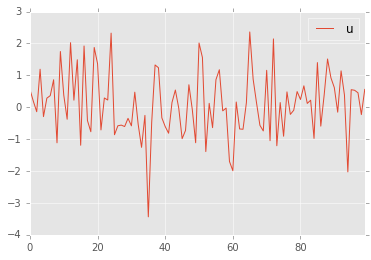

In [65]:
outlier.plot()

中位数法

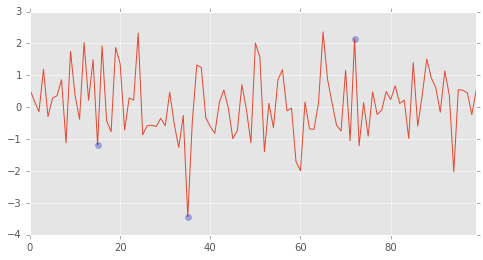

In [108]:
from pandas import rolling_median

kw = dict(marker='o', linestyle='none', color='b', alpha=0.3)

threshold = 2.5*outlier['u'].std()

outlier['pandas'] = outlier['u'].rolling(window = 3, center = True).median()
difference = np.abs(outlier['u'] - outlier['pandas'])
idx = difference > threshold
fig,ax = plt.subplots(figsize=(8, 4))
outlier['u'].plot()
outlier['u'][idx].plot(**kw)

均值法

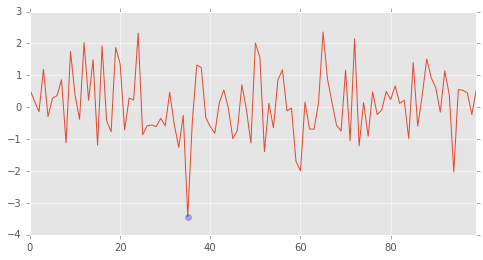

In [142]:
from pandas import rolling_median

kw = dict(marker='o', linestyle='none', color='b', alpha=0.3)

threshold = 2.5*outlier['u'].std()

outlier['pandas'] = outlier['u'].mean()
difference = np.abs(outlier['u'] - outlier['pandas'])
idx = difference > threshold
fig,ax = plt.subplots(figsize=(8, 4))
outlier['u'].plot()
outlier['u'][idx].plot(**kw)